# Testing Gustavo's code 

In [1]:
pip install splusdata --upgrade

Requirement already up-to-date: splusdata in /home/angel/anaconda3/lib/python3.7/site-packages (0.76)
Note: you may need to restart the kernel to use updated packages.


In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import glob
import json
from pathlib import Path
import matplotlib.pyplot as plt
import splusdata as sp
import seaborn as sn
sn.set_context("poster")

In [3]:
ROOT_PATH = Path("..")  # necessary since we are in the sub-folder


In [4]:
sp.get_surveys()

['main3.1', 'main3.2', 'main3.3', 'main3.4', 'main3.5', 'main3.6', 'main3.7', 'main3.8', 'stripe82']


In [ ]:
sp.get_columns()

# Running Gustavo query

In [41]:
df_p = sp.queryidr3('main3.1', ['RA > 48.9', 'RA < 49'], columns=['ID', 'RA', 'DEC'])

input password: idr3splus
['RA ', ' 49']
getting data...

it may take a minute

Done!


In [44]:
df = sp.queryidr3('main3.1', conditions = ['(R_PStotal - F660_PStotal) > 0.6', 'I_PStotal - F660_PStotal > 0.6', 'R_PStotal > 0', 'R_PStotal < 23', 'F515_PStotal > 0', 'F515_PStotal < 23', 'F861_PStotal > 0', 'F861_PStotal < 23', 'I_PStotal > 0', 'I_PStotal < 23', 'R_PStotal < 20.5'], columns='all')

input password: idr3splus
['R_PStotal ', ' 23']
['F515_PStotal ', ' 23']
['F861_PStotal ', ' 23']
['I_PStotal ', ' 23']
['R_PStotal ', ' 20.5']
getting data...

it may take a minute

Error while searching, check if the column exists or if it is typed correctly


# Applying color criterion based on synthetic photometry to the data (color diagram inspired on Viironen's paper)

In [ ]:
df_1 = sp.queryidr3(Survey = 'main3.1', conditions = ['R_PStotal < 20.5', '(R_PStotal - F660_PStotal) > 0.15*(R_PStotal - I_PStotal) + 0.53'], columns='all')

input password: idr3splus
['R_PStotal ', ' 20.5']
getting data...

it may take a minute



In [20]:
# # Saving the table resulting
#file_name = ROOT_PATH / 'DR3-SPLUS/Halpha-emitters.csv'
#df_1.to_csv(file_name, index=False)
df_1

In [15]:
#Colours
x_color = df_1["R_PStotal"] - df_1["I_PStotal"]
y_color = df_1["R_PStotal"] - df_1["F660_PStotal"]

In [16]:
#Criterion
x = np.linspace(-15.0, 15.0, 2000)
y = 0.15*x + 0.53

No handles with labels found to put in legend.


Text(-2.3, 0.19, '$0.15*(r - i) + 0.53$')

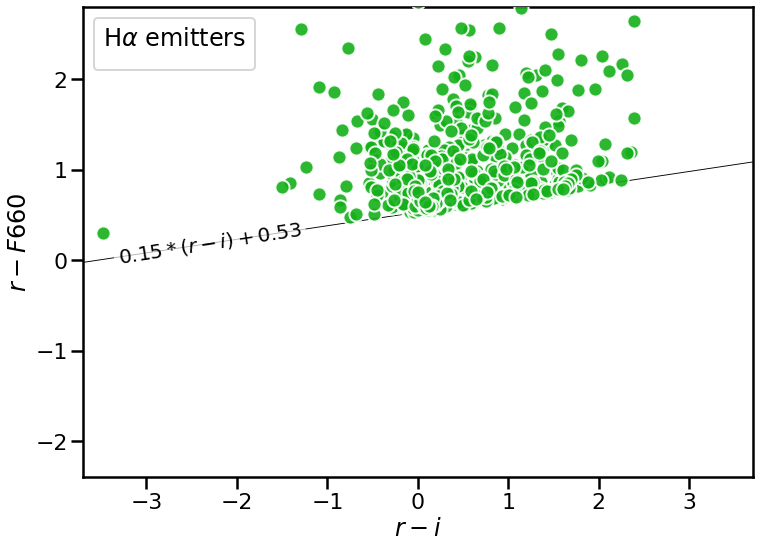

In [17]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.legend(ncol=2).set_title(r"H$\alpha$ emitters")
ax.set(xlim=[-3.7, 3.7], ylim=[-2.4, 2.8])
ax.set_aspect("equal")
ax.set(xlabel=r"$r - i$", ylabel=r"$r - F660$")
ax.scatter(x_color, y_color,  c=sn.xkcd_rgb['green'], 
                  alpha=0.9, marker='o', s=200, zorder=3, edgecolor='w', cmap="Blues")
ax.plot(x, y, c="k", lw=0.9)
textbb = {"facecolor": "white", "alpha": 0.7, "edgecolor": "none"}
textpars = {'ha': 'center', 'va': 'center', 'bbox': textbb, 'fontsize': 'small'}
ax.text(-2.3, 0.19, r'$0.15*(r - i) + 0.53$', rotation=8.8, rotation_mode='anchor', **textpars)


Adding the errors criteria to the query -> It's not working, I dont understand why...

In [ ]:
df_11 = sp.queryidr3_complex(Survey = 'main3.1', conditions = ['R_PStotal < 20.5', 'e_R_PStotal < 0.2', 'e_F660_PStotal < 0.2', 'e_I_PStotal < 0.2', '(R_PStotal - F660_PStotal) > 0.15*(R_PStotal - I_PStotal) + 0.53'], columns='all')